In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/social-network-ads/Social_Network_Ads.csv


# **SOCIAL NETWORK ADS:**
---

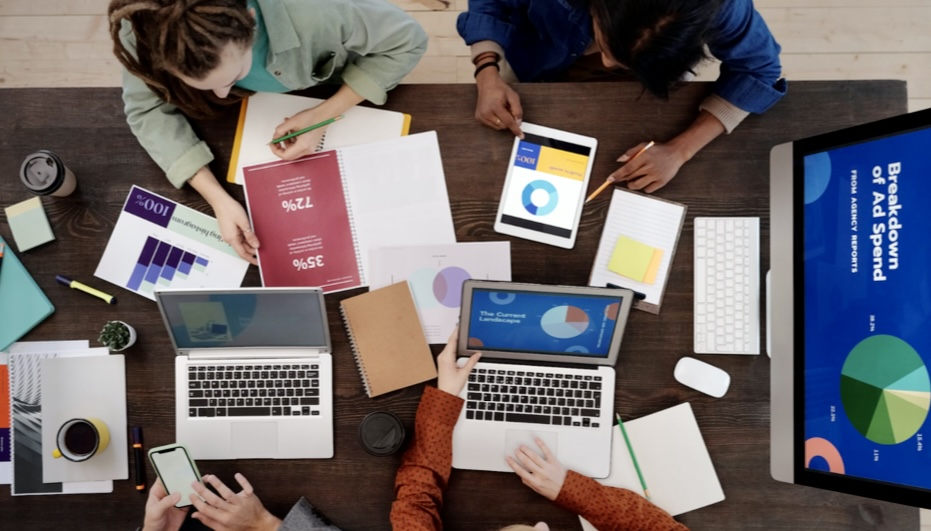

# **Importing Necessary libraries- 📥**

In [2]:
# Data processing, Linear algebra
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger 
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
from time import time

# Model Building
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

# **Mounting Dataset 📂-**

In [3]:
df =pd.read_csv('Social_Network_Ads.csv')

# **Basic Information About Dataset📝-**

In [4]:
#df.shape
print("Shape of the DataFrame is:",df.shape)

Shape of the DataFrame is: (400, 5)


In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
num_cols = df.select_dtypes(include = 'number').columns.size
cat_cols = df.shape[1] - num_cols
print('Number of numerical columns: {} \nNumber of categorical columns: {}'.format(num_cols, cat_cols))

Number of numerical columns: 4 
Number of categorical columns: 1


In [8]:
#df.columns
#df.datatype
print('Datatype in Each Column\n')
pd.DataFrame(df.dtypes, columns=['Datatype']).rename_axis("Column Name")

Datatype in Each Column



,Datatype
Column Name,
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,int64


In [9]:
#Checking duplicate values
df.duplicated().sum()

0

# **Checking for NaN values 🔎-**

In [10]:
#df.isnull()
#df.isnull().sum()
pd.DataFrame(df.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# **Statistical information of Dataframe 📈 -**

In [12]:
df.describe(include = "all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [13]:
df.describe(include = ['O']).T

,count,unique,top,freq
Gender,400,2,Female,204


In [14]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

# **EDA-Exploratory Data Analysis 🎯-**

### **1] Checking Customer Demographic-**

In [15]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

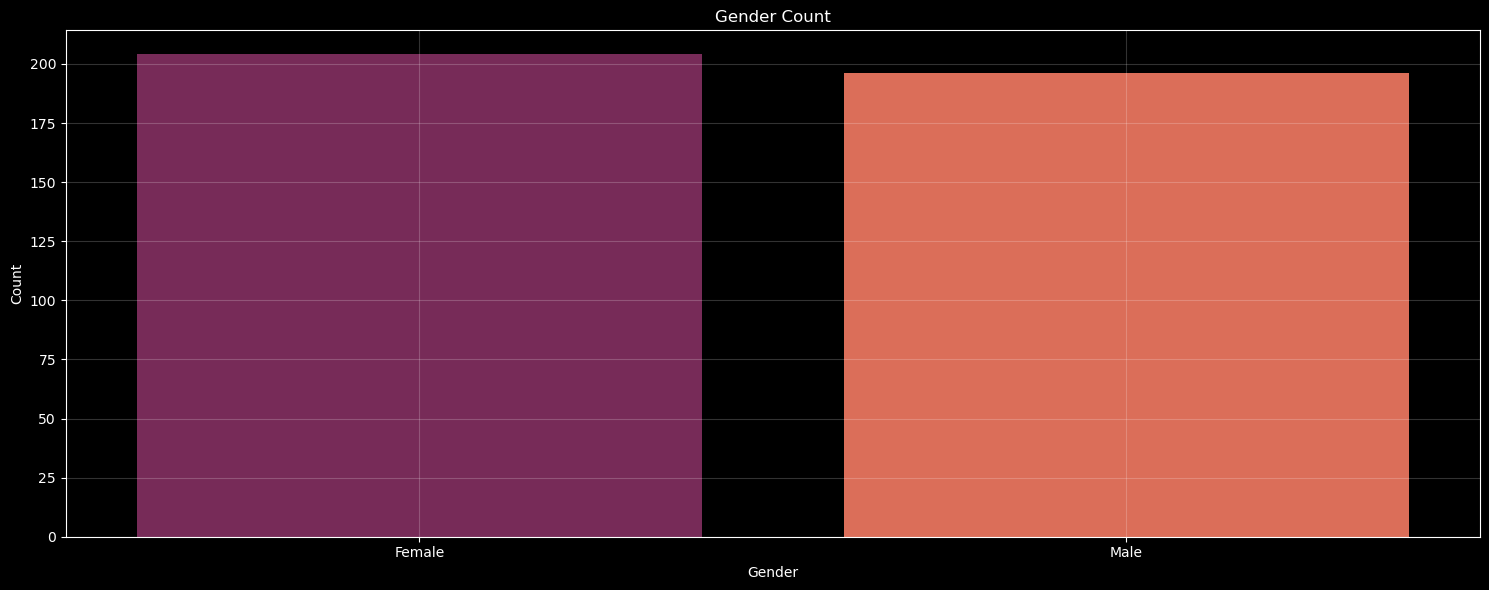

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 6))
sns.countplot(x="Gender", data=df, palette='rocket', order=df['Gender'].value_counts().index)
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(color='white', alpha=0.2)
plt.tight_layout()
plt.show()

**👉 We have Female count/values more than Male in our dataset.**

In [18]:
df['Age'].unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54])

In [19]:
df['Age'].value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

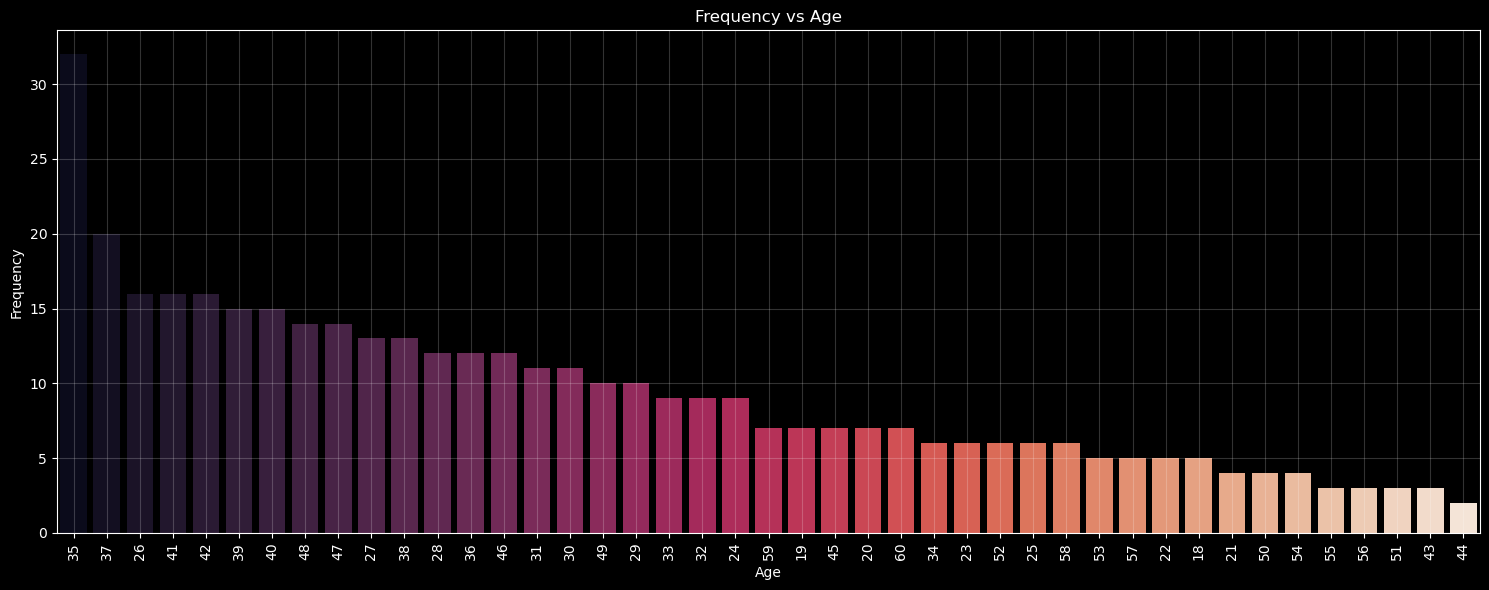

In [20]:
#import matplotlib.pyplot as plt
#import seaborn as sns

plt.style.use('dark_background')

plt.figure(figsize=(15, 6))
sns.countplot(x="Age", data=df, palette='rocket', order=df['Age'].value_counts().index)
plt.title('Frequency vs Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(color='white', alpha=0.2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

👉**We have Maximum age group 35, which are nearly above 30 customers and Minimum age group of 44 below 5 people on dataset.**

### **2] Gender Comparision-**

In [21]:
male_count = [] 
female_count = [] 
for i in df.Gender:
  if i == "Male":  
    i = +1
    male_count.append(i) 
  else:
    i = +1 
    female_count.append(i)
print(f'Male_Count: {sum(male_count)}')
print(f'Female_Count: {sum(female_count)}')

Male_Count: 196
Female_Count: 204


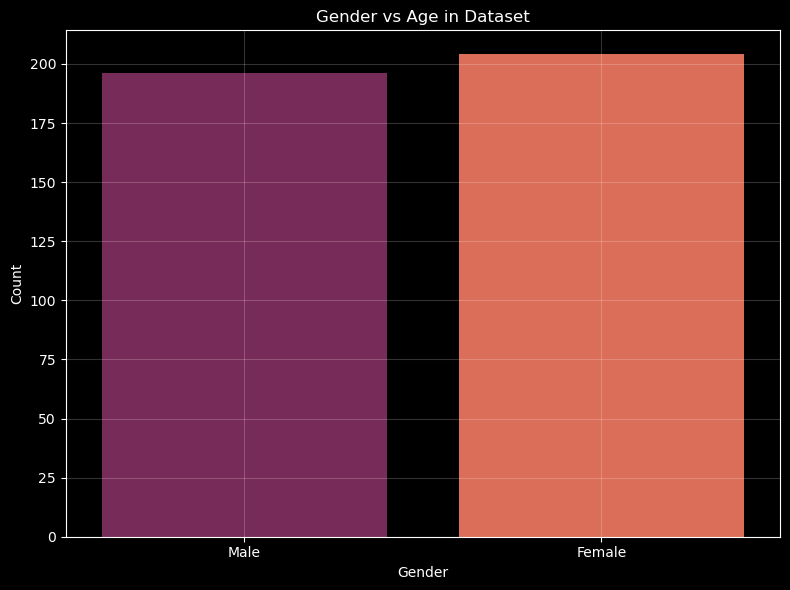

In [22]:
#import matplotlib.pyplot as plt
#import seaborn as sns

plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", data=df, palette='rocket')
plt.title('Gender vs Age in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(color='white', alpha=0.2)
plt.tight_layout()
plt.show()

👉**Female Customer are slighlty higher compare to male customer. Female customer are above 204 and male customer are nearly 196.**

### **3] Age vs Estimated Salary with Purchased Color Encoded-**

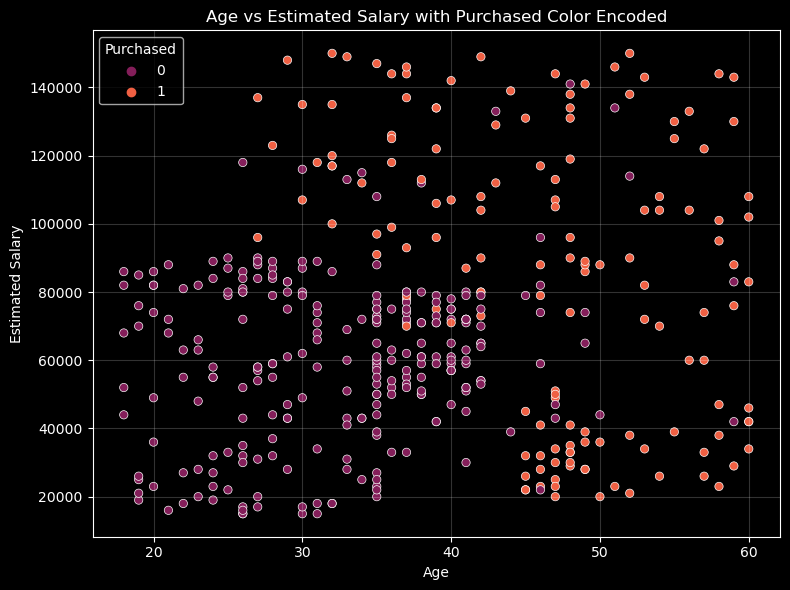

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased", palette="rocket")
plt.title('Age vs Estimated Salary with Purchased Color Encoded')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.grid(color='white', alpha=0.2)
plt.tight_layout()
plt.show()

👉**This graph showcases the demographic of Age and Estimated Salary of customers in a certain dataset. The color encoding of the points indicates whether the customer has purchased a product or not.**

### **4] Gender & Purchased Color-**

<Figure size 1500x600 with 0 Axes>

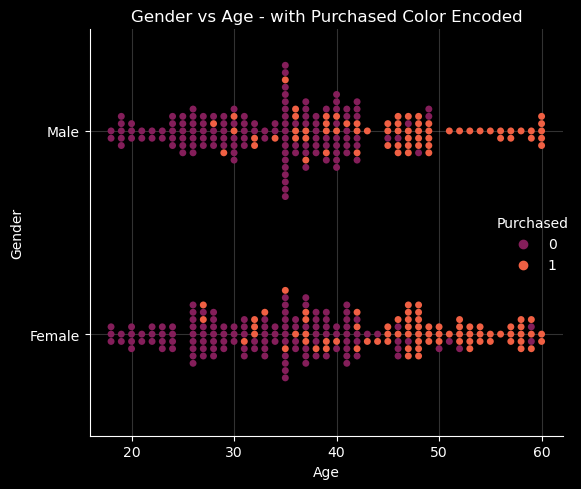

In [24]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 6))
sns.catplot(x="Age", y="Gender", data=df, hue="Purchased", palette='rocket', kind='swarm')
plt.title('Gender vs Age - with Purchased Color Encoded')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.grid(color='white', alpha=0.2)
plt.tight_layout()
plt.show()

### **5] Total Customer purchased and Non - Purchased Frequency Chart-**

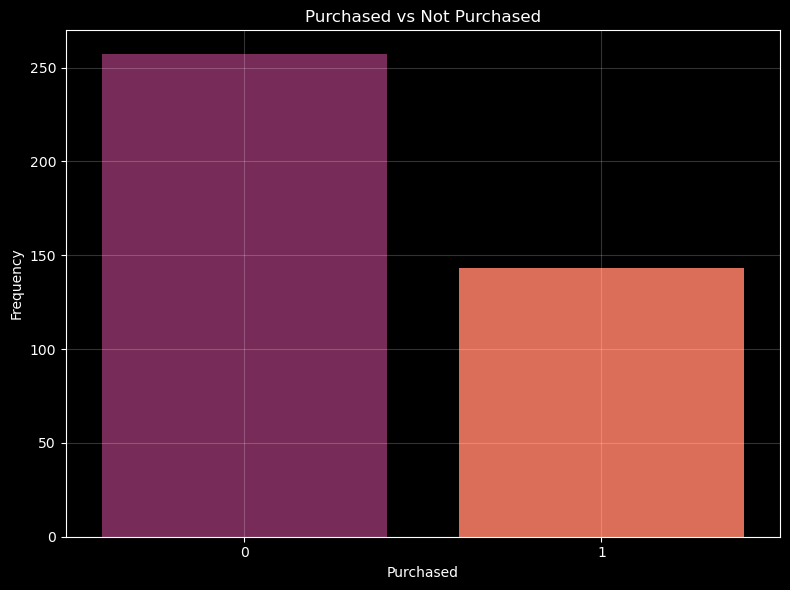

In [25]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.countplot(x="Purchased", data=df, palette='rocket')
plt.title('Purchased vs Not Purchased')
plt.ylabel('Frequency')
plt.grid(color='white', alpha=0.2)
plt.tight_layout()
plt.show()

### **6] Male & Female Transaction-**

In [26]:
#Separating the Male and Female columns
male_df = df[df.Gender == "Male"] 
female_df = df[df.Gender == "Female"]

In [27]:
male_df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
8,15600575,Male,25,33000,0


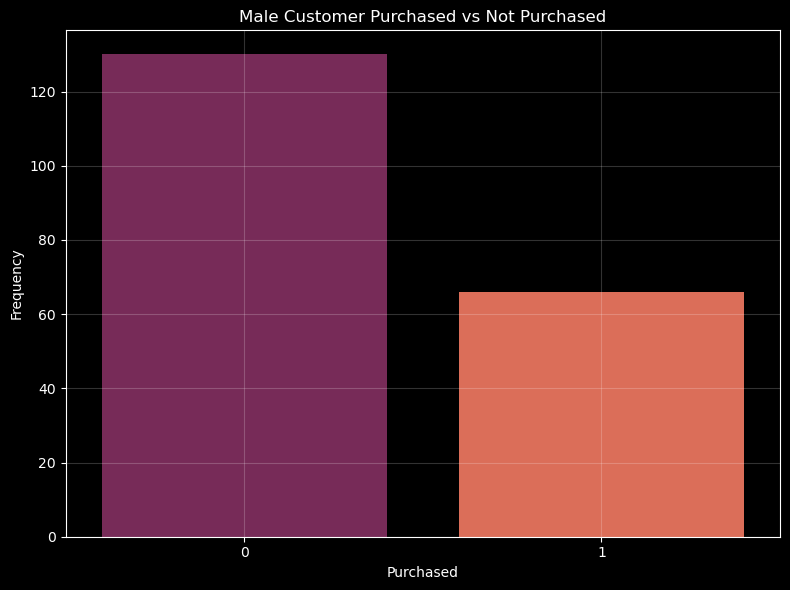

In [28]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.countplot(x="Purchased", data=male_df, palette='rocket')
plt.title('Male Customer Purchased vs Not Purchased')
plt.ylabel('Frequency')
plt.grid(color='white', alpha=0.2)
plt.tight_layout()
plt.show()

In [29]:
female_df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
9,15727311,Female,35,65000,0


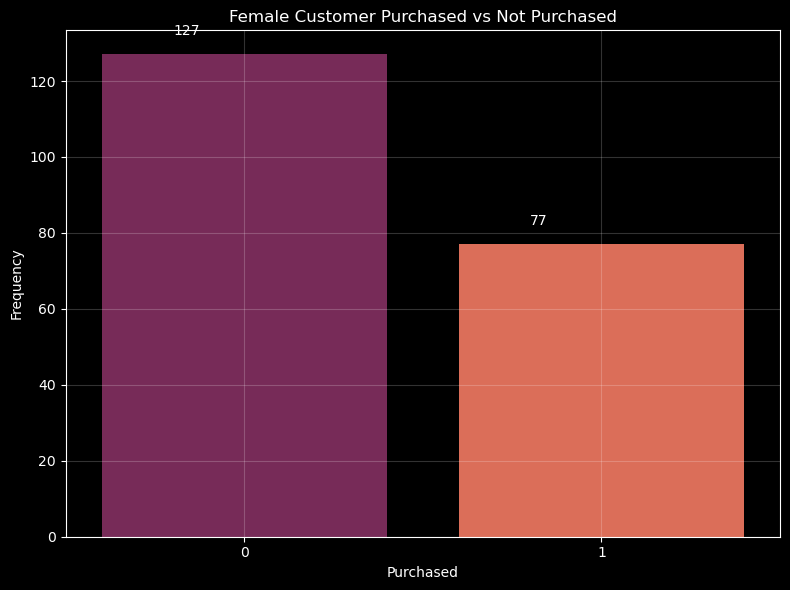

In [30]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.countplot(x="Purchased", data=female_df, palette='rocket')

for i in range(len(female_df['Purchased'].value_counts())):
    count = female_df['Purchased'].value_counts()[i]
    label = str(count)
    plt.annotate(label, (i-0.2, count+5), color='white')

plt.title('Female Customer Purchased vs Not Purchased')
plt.ylabel('Frequency')
plt.grid(color='white', alpha=0.2)
plt.tight_layout()
plt.show()

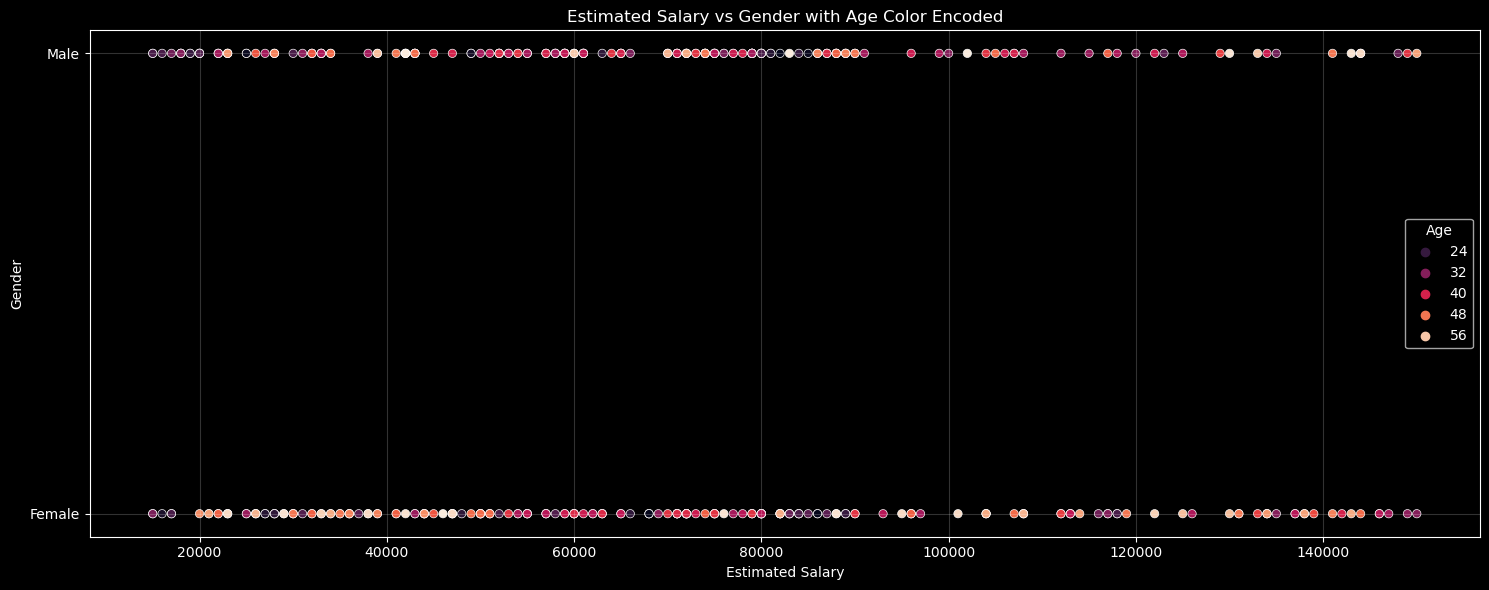

In [31]:
plt.style.use('dark_background')

plt.figure(figsize=(15, 6))
sns.scatterplot(x='EstimatedSalary', y='Gender', hue='Age', data=df, palette='rocket')
plt.title('Estimated Salary vs Gender with Age Color Encoded')
plt.xlabel('Estimated Salary')
plt.ylabel('Gender')
plt.grid(color='white', alpha=0.2)
plt.tight_layout()
plt.show()

##**Correlation-**

**Correlation is a statistical measure that quantifies the degree and direction of the relationship between two variables. It indicates how closely the values of one variable correspond to the values of another variable, suggesting the strength and nature of their association.**

Correlation focuses on the linear relationship between variables, meaning it assesses the extent to which the variables change together at a constant rate. The correlation coefficient is typically used to express the correlation between two variables. It ranges from -1 to 1, where:

 * A correlation coefficient of 1 indicates a perfect positive correlation, where the variables move in the same direction with a constant linear relationship.

 * A correlation coefficient of -1 indicates a perfect negative correlation, where the variables move in opposite directions with a constant linear relationship.

* A correlation coefficient of 0 suggests no linear relationship between the variables.

**Correlation provides valuable insights into the relationship between variables, helping to identify patterns, dependencies, and associations. It is widely used in various fields, such as statistics, economics, social sciences, and data analysis, to understand and interpret the relationships between different variables.**

In [32]:
df_corr = df.corr()
df_corr

/tmp/ipykernel_20/1378791828.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


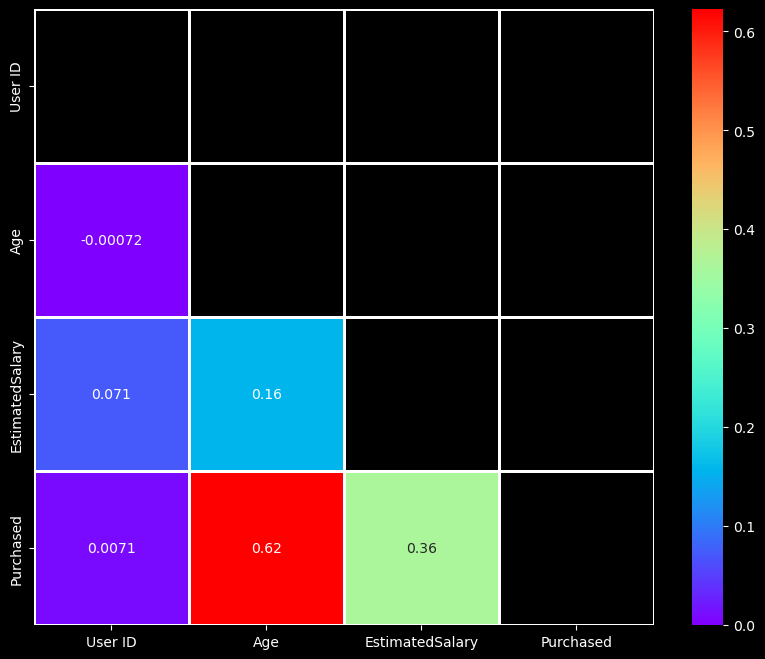

In [33]:
#mport matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np

plt.figure(figsize=(10, 8))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rainbow")
plt.show()

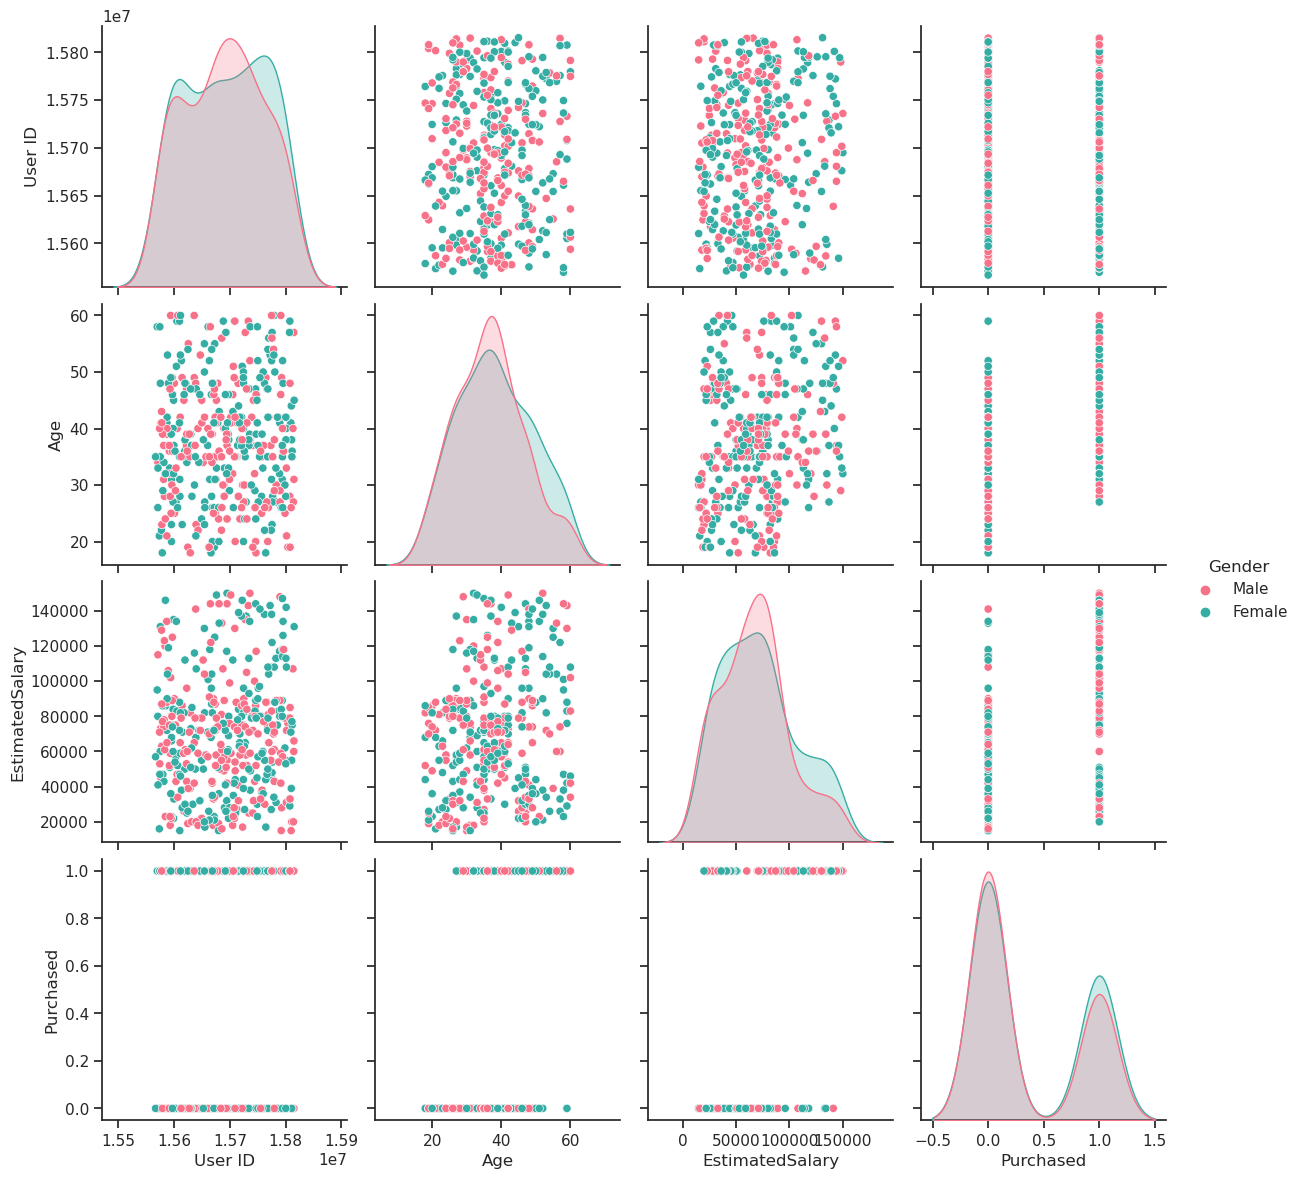

In [34]:
sns.set(style="ticks")

# Generating a colorful palette
palette = sns.color_palette("husl", 2)  # Adjusting the number of colors (2 in this case)

# Plot the pairplot with colorful palette
sns.pairplot(df, hue="Gender", height=3, palette=palette)
plt.show()


# **Model Building-💠**

### **Train-Test Split-**

In [35]:
X = df[['Age', 'EstimatedSalary']].values 
y = df['Purchased']

In [36]:
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=0)

### **Feature Scaling-**

In [37]:
scaler = StandardScaler() 
x_train = scaler.fit_transform(train_X) 
x_test = scaler.fit_transform(test_X)

In [38]:
x_train[:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [39]:
x_test[:5]

array([[-0.49618606,  0.56021375],
       [ 0.2389044 , -0.59133674],
       [-0.03675452,  0.18673792],
       [-0.49618606,  0.31122986],
       [-0.03675452, -0.59133674]])

## **#LOGISTIC REGRESSION MODEL-**

In [40]:
# Train the logistic regression model
clf = LogisticRegression(max_iter=10000, random_state=0) 
clf.fit(x_train, train_y)
# Make predictions on the test set
clf_predictions = clf.predict(x_test)
clf_predictions[:5]

array([0, 0, 0, 0, 0])

In [41]:
# Calculate the accuracy of the model
accuracy = accuracy_score(test_y, clf_predictions) 
print("Accuracy:", f'{accuracy*100}%')

Accuracy: 88.75%


## **#LINEAR REGRESSION MODEL -**

In [42]:
x = df.Age.values.reshape(-1,1)
y = df.EstimatedSalary

In [43]:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=0) 
# Create a Linear Regression model
lr = LinearRegression()
# Fit the model with the training data
lr.fit(train_x, train_y)
# Make predictions on the test data
y_pred = lr.predict(test_x)
y_pred[:5]


array([65581.69999059, 69812.44068416, 68225.91292407, 65581.69999059,
       68225.91292407])

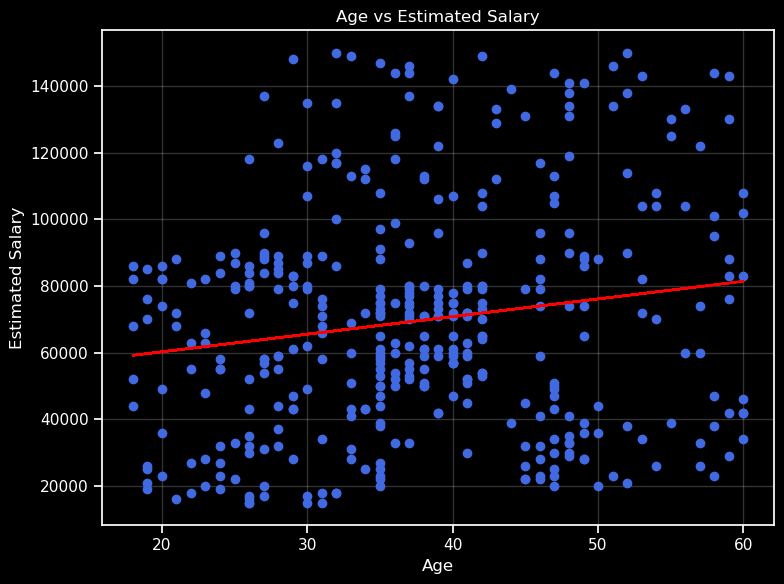

In [44]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="royalblue")
plt.plot(test_x, y_pred, color="red")
plt.title('Age vs Estimated Salary', color='white')
plt.xlabel('Age', color='white')
plt.ylabel('Estimated Salary', color='white')
plt.grid(color='white', alpha=0.2)
plt.tight_layout()
plt.show()

👉**Salary of the person is increasing according to their age.**

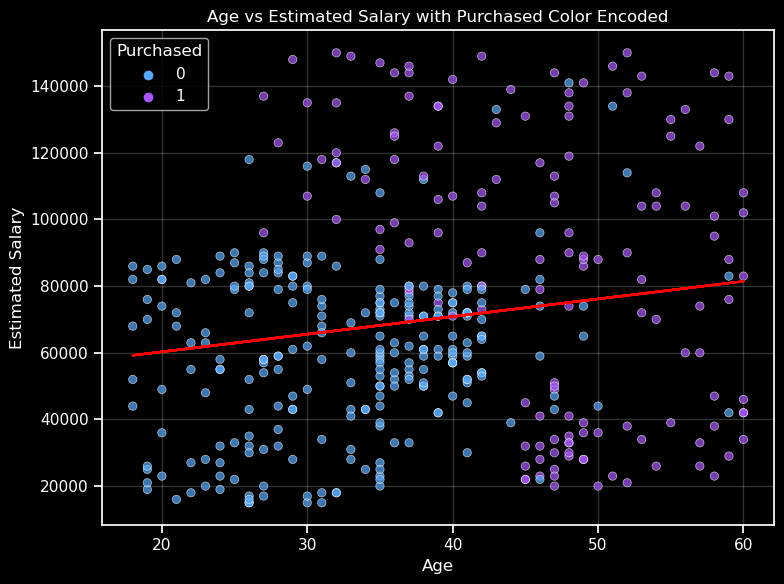

In [45]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased", palette="cool", alpha=0.7)
plt.plot(test_x, y_pred, color="red")
plt.title('Age vs Estimated Salary with Purchased Color Encoded', color='white')
plt.xlabel('Age', color='white')
plt.ylabel('Estimated Salary', color='white')
plt.grid(color='white', alpha=0.2)
plt.tight_layout()
plt.show()

## **Thank You!**